## ISMT E-136 Time Series Analysis with Python, Summer 2021 
### Section 2

## Example 2.6 Differencing Global Temperature

In [1]:
import pandas as pd

df = pd.read_csv('C:/data/Time_Series_Analysis_with_Python/globtemp.csv', parse_dates=['date'],index_col='date')
print("type of df is ",type(df))
df.head(5)

type of df is  <class 'pandas.core.frame.DataFrame'>


,tempdev
date,
1880-01-01,-0.20
1881-01-01,-0.11
1882-01-01,-0.10
1883-01-01,-0.20
1884-01-01,-0.28


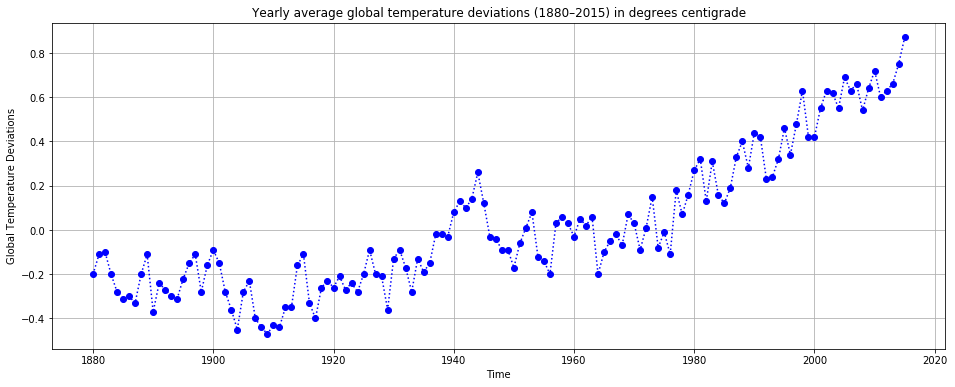

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.plot(df['tempdev'], linestyle=':', marker='o', color='b')
plt.xlabel("Time")
plt.ylabel("Global Temperature Deviations")
plt.title("Yearly average global temperature deviations (1880–2015) in degrees centigrade")
plt.grid(True)

type of df['tempdev'] is  <class 'pandas.core.series.Series'>
type of df['tempdev_diff'] is  <class 'pandas.core.series.Series'>


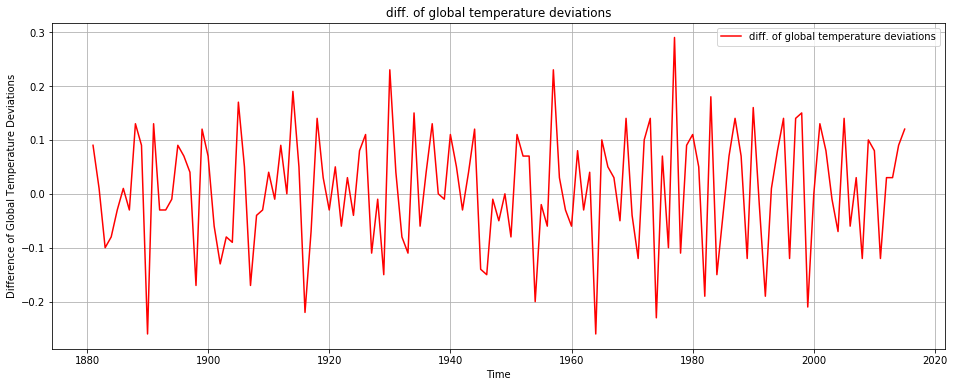

In [4]:
print("type of df['tempdev'] is ",type(df['tempdev']))

df['tempdev_diff'] = df['tempdev'].diff()
print("type of df['tempdev_diff'] is ",type(df['tempdev_diff']))

plt.figure(figsize=(16,6))
plt.plot(df['tempdev_diff'], label = "diff. of global temperature deviations",color="r")
plt.xlabel("Time")
plt.ylabel("Difference of Global Temperature Deviations")
plt.title("diff. of global temperature deviations")
plt.grid(True)
plt.legend()

In [5]:
df.head(5)

,tempdev,tempdev_diff
date,,
1880-01-01,-0.20,NaN
1881-01-01,-0.11,0.09
1882-01-01,-0.10,0.01
1883-01-01,-0.20,-0.10
1884-01-01,-0.28,-0.08


In [6]:
dxt = df['tempdev_diff']
print("original dxt:\n", dxt[:5])

dxt = dxt.dropna(inplace=False)
print("\ndxt with no NaNs:\n", dxt[:5])


original dxt:
 date
1880-01-01     NaN
1881-01-01    0.09
1882-01-01    0.01
1883-01-01   -0.10
1884-01-01   -0.08
Name: tempdev_diff, dtype: float64

dxt with no NaNs:
 date
1881-01-01    0.09
1882-01-01    0.01
1883-01-01   -0.10
1884-01-01   -0.08
1885-01-01   -0.03
Name: tempdev_diff, dtype: float64


Text(0.5, 1.0, 'ACF of diff(global temperature deviations)')

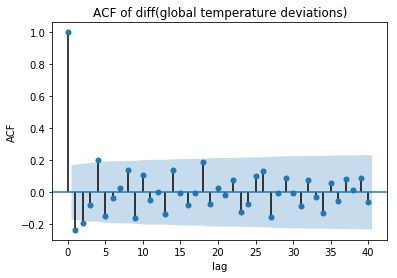

In [7]:
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.stattools import acf

fig = plot_acf(dxt,lags = 40)
plt.xlabel("lag")
plt.ylabel("ACF")
plt.title("ACF of diff(global temperature deviations)")

## Example 2.10 Using Regression to Discover a Signal in Noise


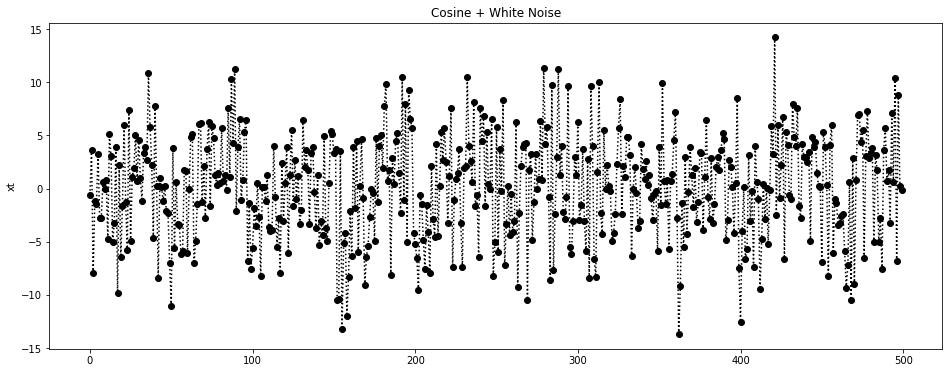

In [8]:
import numpy as np
np.random.seed(453)

n = 500
t = np.arange(1,n+1)

mu = 0
sigma = 5
wt = np.random.normal(mu, sigma, size = n)

pi = np.pi
xt = 2*np.cos(2*pi*t/50 + .6*pi) + wt

plt.figure(figsize=(16,6))
plt.plot(xt,linestyle=':', marker='o', color='k')
plt.xlabel("")
plt.ylabel("xt")
plt.title("Cosine + White Noise")
plt.grid(False)

Text(0.5, 1.0, 'ACF of Cosine with White Noise')

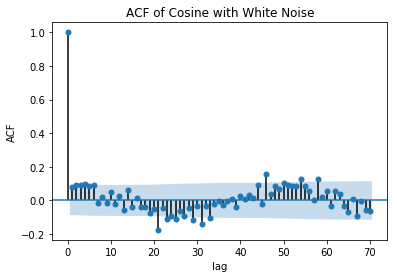

In [11]:
fig = plot_acf(xt,lags = 70)
plt.xlabel("lag")
plt.ylabel("ACF")
plt.title("ACF of Cosine with White Noise")

         z1        z2
0  0.992115  0.125333
1  0.968583  0.248690
2  0.929776  0.368125
3  0.876307  0.481754

intercept:  0.0
coefficients:  [-0.87328603 -1.97017632]


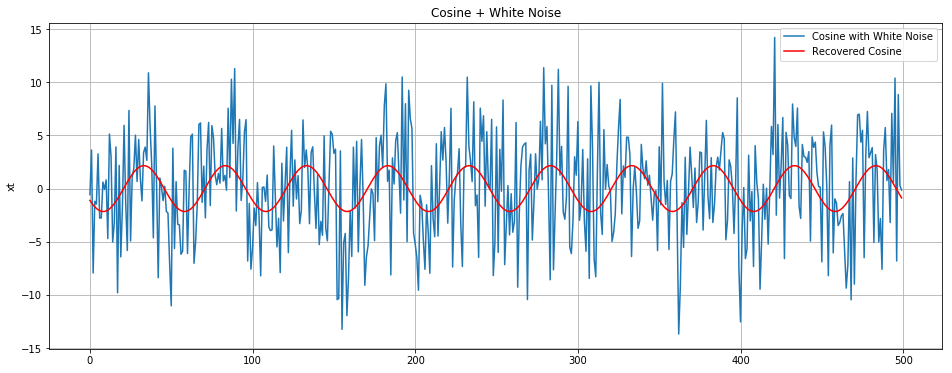

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)

z1 = np.cos(2*pi*t/50)
z2 = np.sin(2*pi*t/50)

# X = t.reshape(-1, 1)
X = pd.DataFrame({'z1':z1, 'z2':z2})
print(X.head(4))

y = xt

model.fit(X,y)
trend = model.predict(X)

print("\nintercept: ", model.intercept_)
print("coefficients: ", model.coef_)



plt.figure(figsize=(16,6))
plt.plot(xt, label = "Cosine with White Noise")
plt.plot(trend, color = "r",label = "Recovered Cosine")
plt.xlabel("")
plt.ylabel("xt")
plt.title("Cosine + White Noise")
plt.grid(True)
plt.legend()

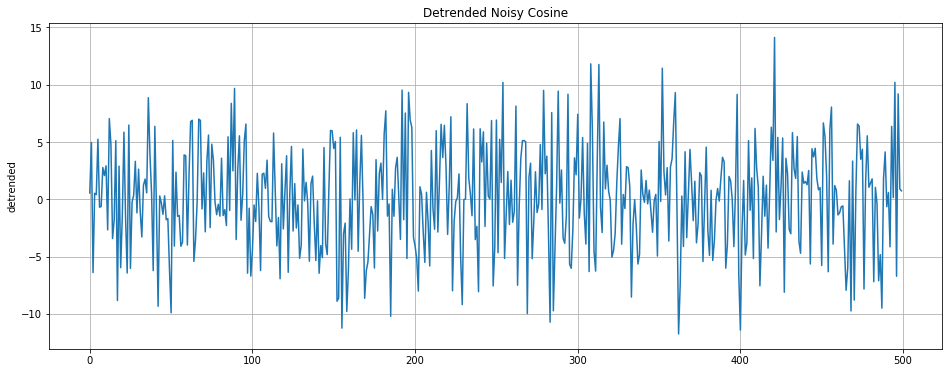

In [14]:
plt.figure(figsize=(16,6))
plt.plot(xt-trend)
plt.xlabel("")
plt.ylabel("detrended")
plt.title("Detrended Noisy Cosine")
plt.grid(True)

Text(0.5, 1.0, 'ACF of Detrended Noisy Cosine')

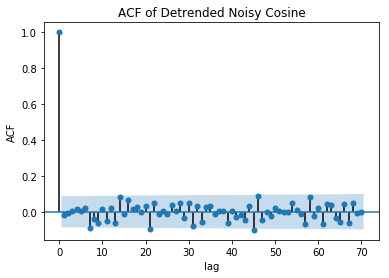

In [15]:
fig = plot_acf(xt-trend,lags = 70)
plt.xlabel("lag")
plt.ylabel("ACF")
plt.title("ACF of Detrended Noisy Cosine")

In [16]:
xt_tmp = pd.DataFrame({'xt':xt})
xt_ma5 = xt_tmp.rolling(window=5).mean()
print(xt_ma5.head(10))
print(xt_ma5.tail(10))

xt_ma20 = xt_tmp.rolling(window=20).mean()

         xt
0       NaN
1       NaN
2       NaN
3       NaN
4 -1.506844
5 -0.740632
6 -2.019963
7 -0.984221
8 -0.621933
9 -0.346083
           xt
490 -0.063809
491  0.856370
492  1.736353
493  2.432505
494  1.406321
495  3.333383
496  1.613446
497  4.019004
498  2.661556
499  2.513079


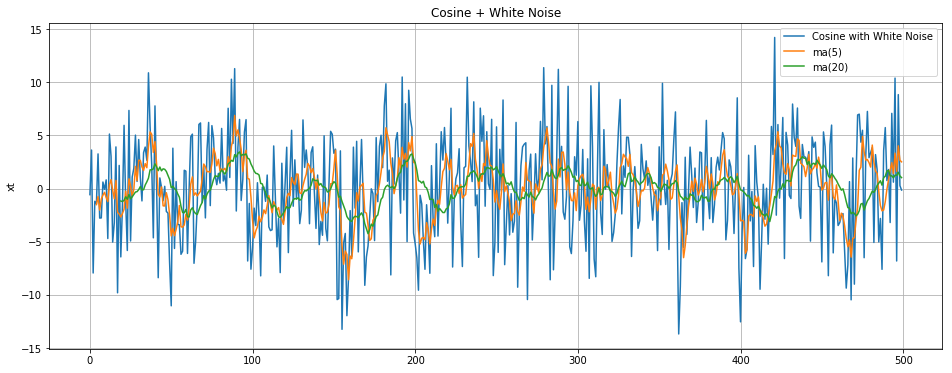

In [17]:
plt.figure(figsize=(16,6))
plt.plot(xt, label = "Cosine with White Noise")
plt.plot(xt_ma5, label = "ma(5)")
plt.plot(xt_ma20, label = "ma(20)")
plt.xlabel("")
plt.ylabel("xt")
plt.title("Cosine + White Noise")
plt.grid(True)
plt.legend()